In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
#%matplotlib qt   # doesn't work on my laptop
from tistools import read_inputfile, get_LMR_interfaces, read_pathensemble, get_weights
from tistools import set_tau_distrib, set_tau_first_hit_M_distrib, cross_dist_distr, pathlength_distr
from tistools import collect_tau, collect_tau1, collect_tau2, collect_taum
from tistools import ACCFLAGS, REJFLAGS

from tistools import get_lmr_masks, get_generation_mask, get_flag_mask
from tistools import unwrap_by_weight, running_avg_local_probs, get_local_probs, get_globall_probs, get_global_probz

from pprint import pprint    # to print the vars of the pathensemble object

In [2]:
%autoreload 2   
# something with pip install -e .

# Reading

In [3]:
# zero_minus_one = True if lambda_-1 interface is set
# zero_minus_one = False if lambda_-1 interface is not set

# data the maze
#---------------
indir = "/Users/an/Documents/0_mfpt/repptis1/"
zero_minus_one = True
inputfile = indir + "/out.rst"
#inputfile = indir + "/retis.rst"

# new data Elias
#---------------
indir = "/Users/an/Documents/0_mfpt/elias/flat-no-walls/REPPTIS/"
#indir = "/Users/an/Documents/0_mfpt/elias/flat-no-walls/RETIS/"
zero_minus_one = True
#indir = "/Users/an/Documents/0_mfpt/elias/flat-w-walls/50k-cycles/REPPTIS/"
zero_minus_one = False
indir = "/Users/an/Documents/0_mfpt/elias/cosbump2-walls/REPPTIS/"
zero_minus_one = False
#indir = "/Users/an/Documents/0_mfpt/elias/flat-w-walls/newtonian/REPPTIS/"
#zero_minus_one = False
inputfile = indir + "/out.rst"

# old data bump An
#------------------
#indir = "/Users/an/wwork/current-work/0_TitusEnrico/repp/1D-flat.ppr-Febr6-2022d/"
##indir = "/Users/an/wwork/current-work/0_TitusEnrico/repp/bump-ppretis/"
#inputfile = indir + "/out.rst"

import os
import glob
os.chdir(indir)

folders = glob.glob(indir + "/0[0-9][0-9]")
folders = sorted(folders)
print(folders)

['/Users/an/Documents/0_mfpt/elias/cosbump2-walls/REPPTIS/000', '/Users/an/Documents/0_mfpt/elias/cosbump2-walls/REPPTIS/001', '/Users/an/Documents/0_mfpt/elias/cosbump2-walls/REPPTIS/002', '/Users/an/Documents/0_mfpt/elias/cosbump2-walls/REPPTIS/003', '/Users/an/Documents/0_mfpt/elias/cosbump2-walls/REPPTIS/004']


In [4]:
# !!! last lines !!!  allow to speed up this notebook
# pe.set_orders(load=False...)  -> 1st time you run the code, this will store npy files
# pe.set_orders(load=True...)  -> next time you run the code, you can read npy files

# Reading all input
#===================
interfaces, zero_left, timestep = read_inputfile(inputfile)
LMR_interfaces, LMR_strings = get_LMR_interfaces(interfaces, zero_left)
pathensembles = []
for i,fol in enumerate(folders):
    print("#"*80)
    print(fol)
    pe = read_pathensemble(fol+"/pathensemble.txt")
    pe.set_name(fol[len(indir):])
    pe.set_interfaces([LMR_interfaces[i], LMR_strings[i]])
    if i==0:
        pe.set_zero_minus_one(zero_minus_one)   # TODO this is never used
        pe.set_in_zero_minus(True)
    if i==1:
        pe.set_in_zero_plus(True)
    w, _ = get_weights(pe.flags, ACCFLAGS, REJFLAGS, verbose = False)
    pe.set_weights(w)
    print("pathensemble info: ")
    pprint(vars(pe))
    pathensembles.append(pe)
    # read order parameters order.txt/order.npy into path ensemble object
    #pe.set_orders(load=False, acc_only=True, save=False) # if saving doesn't work
    #### CHANGE HERE ####
    #pe.set_orders(load=False, acc_only=True, save=True) # for the 1st time
    pe.set_orders(load=True, acc_only=True) # for the next times, save=True/False is not important

################################################################################
/Users/an/Documents/0_mfpt/elias/cosbump2-walls/REPPTIS/000
pathensemble info: 
{'cyclenumbers': array([    0,     1,     2, ..., 29998, 29999, 30000]),
 'flags': array(['ACC', 'ACC', 'BTL', ..., 'BTL', 'FTL', 'BTL'], dtype='<U3'),
 'generation': array(['ki', 'sh', 'sh', ..., 'sh', 'sh', 'sh'], dtype='<U2'),
 'has_zero_minus_one': False,
 'in_zero_minus': True,
 'in_zero_plus': False,
 'interfaces': [[-0.1, -0.1, -0.1], ['l_[0]', 'l_[0]', 'l_[0]']],
 'lambmaxs': array([-0.08922184, -0.08137773, -0.10142089, ..., -0.10475691,
       -0.0912448 , -0.09951847]),
 'lambmins': array([-0.105     , -0.10142089, -0.11016192, ..., -0.10531599,
       -0.10531599, -0.10531599]),
 'lengths': array([5, 3, 2, ..., 2, 4, 3]),
 'lmrs': array(['RMR', 'RMR', '***', ..., '***', 'RM*', '*MR'], dtype='<U3'),
 'name': '000',
 'ncycle': 30001,
 'newpathnumbers': array([   0,    1,    1, ..., 9187, 9187, 9187]),
 'orders': None,

# Analysis

In [5]:
# Setting path ensemble properties
#==================================
for i,fol in enumerate(folders):
    print(i)
    print("Calculating path lengths.")
    set_tau_distrib(pathensembles[i])
    print("Done.")

    if True:
        print("Calculating first hitting lengths to middle interface")
        set_tau_first_hit_M_distrib(pathensembles[i])
        print("Done.")

0
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
1
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
2
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
3
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.
4
Calculating path lengths.
Done.
Calculating first hitting lengths to middle interface
Done.


In [6]:
# Analyze the pptis simulation.
# Analysis output is saved to the data dictionary.
data = {}
for i, pe in enumerate(pathensembles):
    print("doing pathensemble {}".format(i))
    if i == 0:
        data[i] = {}
        continue  # TODO: make [0-] analysis ???

    # masks - TODO not used further on?
    # TODO these functions are duplicate in repptis_analysis
    #masks = get_lmr_masks(pe)
    #loadmask = get_generation_mask(pe, "ld")
    #print("Amount of loads: {}".format(np.sum(loadmask)))
    ##hardloadmask = get_hard_load_mask(loadmask)
    #accmask = get_flag_mask(pe, "ACC")

    # pathtype_cycles
    pathtypes = ("LML", "LMR", "RML", "RMR")
    pathtype_cycles = {}
    for ptype in pathtypes:
        pathtype_cycles[ptype] = unwrap_by_weight(
                (pe.lmrs == ptype).astype(int), pe.weights)
    
    # running average analysis: ["running"]
    data[i] = {}
    data[i]["running"] = {}
    data[i]["running"]["plocal"] = {}
    # you'll still have to hardload select pe.weigths... TODO. # this is comment wouter?
    for (ptype, p_loc) in zip(pathtypes, 
                              running_avg_local_probs(pathtype_cycles, 
                                                      pe.weights, tr = False)):
        data[i]["running"]["plocal"][ptype] = p_loc

    # analysis using all data: ["full"]
    plocfull = get_local_probs(pe, tr=False)
    data[i]["full"] = {}
    for ptype in pathtypes:
        data[i]["full"][ptype] = plocfull[ptype]

    # data[i] have now ["full"] and ["running"]

doing pathensemble 0
doing pathensemble 1
Weights of the different paths:
wRMR = 0
wRML = 1632
wLMR = 1544
wLML = 26825
Local crossing probabilities:
pRMR = 0.0
pRML = 1.0
pLMR = 0.05442560541436075
pLML = 0.9455743945856393
Local crossing probabilities:
p2R = 0.05146495116829439
p2L = 0.9485350488317056
doing pathensemble 2
Weights of the different paths:
wRMR = 6701
wRML = 8101
wLMR = 8171
wLML = 7028
Local crossing probabilities:
pRMR = 0.4527090933657614
pRML = 0.5472909066342386
pLMR = 0.5376011579709191
pLML = 0.4623988420290809
Local crossing probabilities:
p2R = 0.4957168094396853
p2L = 0.5042831905603147
doing pathensemble 3
Weights of the different paths:
wRMR = 7403
wRML = 7732
wLMR = 7685
wLML = 7181
Local crossing probabilities:
pRMR = 0.4891311529567228
pRML = 0.5108688470432772
pLMR = 0.5169514327996771
pLML = 0.4830485672003229
Local crossing probabilities:
p2R = 0.502916569447685
p2L = 0.4970834305523149
doing pathensemble 4
Weights of the different paths:
wRMR = 6870


/Users/an/wwork/code/tistools/lib/repptis_analysis.py:555: RuntimeWarning: invalid value encountered in divide
  p_PP = cumsums['RMR']/(cumsums['RML']+cumsums['RMR'])
/Users/an/wwork/code/tistools/lib/repptis_analysis.py:556: RuntimeWarning: invalid value encountered in divide
  p_PN = cumsums['RML']/(cumsums['RML']+cumsums['RMR'])


In [7]:

for i, pe in enumerate(pathensembles):
    upe = pe.unify_pe()
    # Pathlength distribution
    data[i]["pathlengths"] = pathlength_distr(upe)  # these might be used later or not! TODO
        
#=======================================
# make figures
makefigs = True 
if makefigs:
    for i, pe in enumerate(pathensembles):     
        if i == 0:
            continue
        # Cross distances distribution
        L, M, R, lmlpercs, lmllambs, rmrpercs, rmrlambs = cross_dist_distr(pe)
        fig,ax = plt.subplots()
        ax.plot(lmllambs, lmlpercs, lw=1, c="g")
        ax.plot(rmrlambs, rmrpercs, lw=1, c="r")
        for lamb in (L,M,R):
            ax.axvline(lamb, color='k', linestyle='--', lw = 0.5)
        ax.set_xlabel('Cross distance')
        ax.set_ylabel('Frequency')
        ax.set_title("Ensemble {}. L = {}, M = {}, R = {}".format(
            pe.name, L, M, R))
        ax.set_ylim(0)
        fig.savefig(f"pathensemble_{i}_crossdist.pdf")
        plt.close(fig)

        # Pathlength distribution      
        for ptype in pathtypes:
            fig, ax = plt.subplots()
            ax.plot(data[i]["pathlengths"][ptype]["bin_centers"], 
                data[i]["pathlengths"][ptype]["hist"])
            ax.set_xlabel('Pathlength')
            ax.set_ylabel('Frequency')
            ax.set_title(f"{np.sum(data[i]['pathlengths'][ptype]['hist'])} " + \
                         f"{ptype} paths. ")
            ax.legend([f"mean = {data[i]['pathlengths'][ptype]['mean']:.2f}, " + \
                          f"std = {data[i]['pathlengths'][ptype]['std']:.2f}"])
            fig.savefig(f"pathensemble_{i}_pathlength_{ptype}.pdf")
            plt.close(fig)

Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True
Are all weights 1?  True
Are all paths accepted?  True


/Users/an/opt/anaconda3/envs/tistools3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/an/opt/anaconda3/envs/tistools3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/an/opt/anaconda3/envs/tistools3/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/an/opt/anaconda3/envs/tistools3/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/an/opt/anaconda3/envs/tistools3/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Pcross with recursive relations

In [8]:
# Global crossing probabilities
# WITHOUT ERRORS #  
# Full data 
psfull = []
for i in range(1, len(pathensembles)):   # do not use the 0- ensemble
    psfull.append({"LMR": data[i]["full"]["LMR"], 
               "RML": data[i]["full"]["RML"], 
               "RMR": data[i]["full"]["RMR"],
               "LML": data[i]["full"]["LML"]})

Pminfull, Pplusfull, Pcrossfull = get_globall_probs(psfull)

/var/folders/n7/pwfrkg556gn5m722jq91lq_h0000gn/T/ipykernel_2738/2475102732.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


This should be the same as the repptis_report.pdf value: 0.014768152029271706
which is the case!
Here, the load immediately disappeared. For a simulation where this is
not the case, the above code should be adapted a little bit.


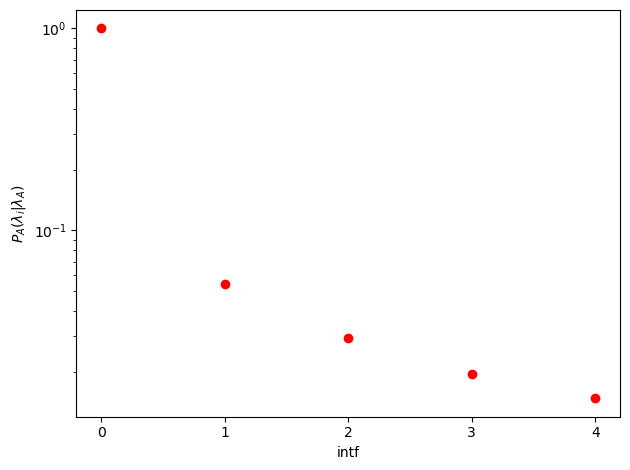

In [9]:
# Make a figure of the global crossing probabilities
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.plot(Pcrossfull, "o", c = "r")
ax.set_xlabel("intf")
ax.set_ylabel(r"$P_A(\lambda_i|\lambda_A)$")
ax.set_xticks(np.arange(len(interfaces)))
fig.tight_layout()
fig.show()
fig.savefig("Global_probs.pdf")

print("This should be the same as the repptis_report.pdf value:", Pcrossfull[-1])
print("which is the case!")
print("Here, the load immediately disappeared. For a simulation where this is")
print("not the case, the above code should be adapted a little bit.")

In [10]:
# TODO I am not sure what this is

# Construct lists of the local probs

# Or we can use the get_global_probz function, using lists of the local probs
# These do not use the 0- ensemble
pmps = [data[i]["full"]["LMR"] for i in range(1,len(pathensembles))]
pmms = [data[i]["full"]["LML"] for i in range(1,len(pathensembles))]
ppps = [data[i]["full"]["RMR"] for i in range(1,len(pathensembles))]
ppms = [data[i]["full"]["RML"] for i in range(1,len(pathensembles))]
a,b,c = get_global_probz(pmps, pmms, ppps, ppms)
print("This should be the same as the repptis_report.pdf value:", c[-1])

This should be the same as the repptis_report.pdf value: 0.014768152029271706


# Now work with MSM

In [11]:
from tistools import construct_M
from tistools import global_cross_prob
from tistools import mfpt_to_first_last_state

from tistools import create_labels_states

In [12]:
def print_vector(g, states=None):
    if states is None:
        for i in range(len(g)):
            print("state", i, g[i])
    else:
        for i in range(len(g)):
            print("state", states[i], g[i][0])

In [13]:
print(interfaces)
N = len(interfaces)
assert N >= 4
NS = 4*N-5
print("N", N)
print("len pmms", len(pmms))
print("NS", NS)

#labels2 = ["0+- LML","0+- LMR","0+- RML","1+- LML","1+- LMR",
#           "1+- RML", "1+- RMR", "2+- LML", "2+- LMR",
#           "2+- RML", "2+- RMR", "3+- LML", "3+- LMR",]
labels1, labels2 = create_labels_states(N)

[-0.1, 0.0, 0.1, 0.2, 0.3]
N 5
len pmms 4
NS 15


In [14]:
print("mm", pmms)
print("mp", pmps)
print("pm", ppms)
print("pp", ppps)
print("sum", np.array(pmms)+np.array(pmps))
print("sum", np.array(ppms)+np.array(ppps))
M = construct_M(pmms, pmps, ppms, ppps, N)

#Local crossing probabilities:
#pRMR = 0.34205627942625644.  #ppps
#pRML = 0.6579437205737436.   #ppms
#pLMR = 0.25316455696202533.  #pmps
#pLML = 0.7468354430379747.   #pmms

mm [0.9455743945856393, 0.4623988420290809, 0.4830485672003229, 0.4648713504866018]
mp [0.05442560541436075, 0.5376011579709191, 0.5169514327996771, 0.5351286495133982]
pm [1.0, 0.5472909066342386, 0.5108688470432772, 0.5419694646309754]
pp [0.0, 0.4527090933657614, 0.4891311529567228, 0.4580305353690246]
sum [1. 1. 1. 1.]
sum [1. 1. 1. 1.]


In [15]:
print("M")
print("shape", M.shape)
print("sum prob in rows", np.sum(M,axis=1))
print(M)
# row 8, 10, 12, 14. # counting starts from 0   not okay!!!!

M
shape (15, 15)
sum prob in rows [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.         0.94557439 0.05442561 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.46239884 0.53760116
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.48304857 0.51695143 0.         0.
  0.       

# Look at this Markov model

In [16]:
#import numpy.linalg
vals, vecs = np.linalg.eig(M)
print(vals)
vals, vecs = np.linalg.eig(M.T)
print(vals)

[ 1.00000000e+00+0.00000000e+00j -1.00000000e+00+0.00000000e+00j
  6.27272077e-01+0.00000000e+00j -6.27272077e-01+0.00000000e+00j
  1.06963205e-01+0.00000000e+00j -1.06963205e-01+0.00000000e+00j
 -9.31854965e-17+1.15210472e-01j -9.31854965e-17-1.15210472e-01j
  1.20104742e-16+9.87295564e-09j  1.20104742e-16-9.87295564e-09j
  1.68221741e-16+4.73816559e-17j  1.68221741e-16-4.73816559e-17j
 -1.24783412e-16+0.00000000e+00j -1.08026334e-17+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j]
[-1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
 -6.27272077e-01+0.00000000e+00j  6.27272077e-01+0.00000000e+00j
 -1.06963205e-01+0.00000000e+00j  5.62917768e-16+1.15210472e-01j
  5.62917768e-16-1.15210472e-01j  1.06963205e-01+0.00000000e+00j
 -4.41698496e-09+0.00000000e+00j  4.41698085e-09+0.00000000e+00j
  3.18422486e-15+0.00000000e+00j  1.85354489e-16+0.00000000e+00j
  5.15057393e-17+1.12120943e-16j  5.15057393e-17-1.12120943e-16j
 -1.67288920e-17+0.00000000e+00j]


In [17]:
print("what if chain propagates")
print("A[0,:]")
# check stationary behavior
A = M
for n in range(10):
    A = np.dot(A,M)
    #print(A)
    print(A[0,:])
    print(np.sum(A[0,:]))  # is 1 indeed

what if chain propagates
A[0,:]
[0.94557439 0.         0.         0.         0.02516634 0.02925927
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
1.0
[0.         0.89411094 0.05146346 0.02516634 0.         0.
 0.         0.         0.01413365 0.01512562 0.         0.
 0.         0.         0.        ]
1.0000000000000002
[0.91927727 0.         0.         0.         0.02379664 0.02766682
 0.00773522 0.00639843 0.         0.         0.         0.
 0.00703147 0.00809415 0.        ]
1.0000000000000002
[0.         0.86924505 0.05003222 0.03153186 0.         0.
 0.         0.         0.01645517 0.01761008 0.00359216 0.00343931
 0.         0.         0.00809415]
1.0000000000000004
[0.90887106 0.         0.         0.         0.02313484 0.02689738
 0.01097172 0.00907561 0.         0.         0.         0.
 0.00978526 0.01126413 0.        ]
1.0000000000000002
[0.         0.85940521 0.04946586 0.03410656 0.         0.
 0.         0.         0.0173767

# Pcross with MSM

In [18]:
# global crossing prob
z1, z2, y1, y2 = global_cross_prob(M)
print("Z")
print_vector(z1, labels1)
print_vector(z2, labels2)
print("Y")
print_vector(y1, labels1)
print_vector(y2, labels2)
print("global crossing prob", y1[0])

Z
state 0-      0
state B       1
state 0+- LML 0.0
state 0+- LMR 0.2713456638072598
state 0+- RML 0.0
state 1+- LML 0.0
state 1+- LMR 0.5047341505576479
state 1+- RML 0.0
state 1+- RMR 0.5047341505576479
state 2+- LML 0.2284977396896905
state 2+- LMR 0.7628543413764901
state 2+- RML 0.2284977396896905
state 2+- RMR 0.7628543413764901
state 3+- LML 0.48986820036279105
state 3+- LMR 1.0
Y
state 0-      0.01476815202927171
state B       0.0
state 0+- LML 0.0
state 0+- LMR 0.2713456638072598
state 0+- RML 0.0
state 1+- LML 0.0
state 1+- LMR 0.5047341505576479
state 1+- RML 0.0
state 1+- RMR 0.5047341505576479
state 2+- LML 0.22849773968969048
state 2+- LMR 0.7628543413764901
state 2+- RML 0.22849773968969048
state 2+- RMR 0.7628543413764901
state 3+- LML 0.4898682003627911
state 3+- LMR 1.0
global crossing prob [0.01476815]


# Collecting times

In [19]:
def print_all_tau(pathensembles, taumm, taump, taupm, taupp):
    # print all tau
    print(f"                  mm            mp            pm            pp")
    for i in range(len(pathensembles)):
        print(f"{i} {pathensembles[i].name}  {taumm[i]:13.1f} {taump[i]:13.1f} {taupm[i]:13.1f} {taupp[i]:13.1f}")

In [20]:
tau_mm, tau_mp, tau_pm, tau_pp = collect_tau(pathensembles)
tau1_mm, tau1_mp, tau1_pm, tau1_pp = collect_tau1(pathensembles)
tau2_mm, tau2_mp, tau2_pm, tau2_pp = collect_tau2(pathensembles)
taum_mm, taum_mp, taum_pm, taum_pp = collect_taum(pathensembles)

Collect tau
ensemble 0 000
ensemble 1 001
ensemble 2 002
ensemble 3 003
ensemble 4 004
Collect tau1
Collect tau2
Collect taum


In [21]:
print("tau")
print_all_tau(pathensembles, tau_mm, tau_mp, tau_pm, tau_pp)
print("\ntau1")
print_all_tau(pathensembles, tau1_mm, tau1_mp, tau1_pm, tau1_pp)
print("\ntaum")
print_all_tau(pathensembles, taum_mm, taum_mp, taum_pm, taum_pp)
print("\ntau2")
print_all_tau(pathensembles, tau2_mm, tau2_mp, tau2_pm, tau2_pp)

tau
                  mm            mp            pm            pp
0 000            nan           nan           nan          61.7
1 001           10.1          50.9          50.1           nan
2 002          148.3         141.6         142.2         151.0
3 003          270.1         262.9         267.1         280.2
4 004          147.6         138.5         139.5         149.6

tau1
                  mm            mp            pm            pp
0 000            nan           nan           nan           0.0
1 001            0.0           0.0          50.1           nan
2 002           48.3          48.9          49.8          49.1
3 003           48.8          48.1          49.4          49.8
4 004           48.8          49.4          48.3          48.2

taum
                  mm            mp            pm            pp
0 000            0.0           0.0           0.0          61.7
1 001           10.1           0.0           0.0           0.0
2 002           49.7          43.5     

In [22]:
def construct_tau_vector(N, NS, taumm, taump, taupm, taupp):
    assert N>=3
    assert NS==4*N-5
    assert len(taumm) == N
    assert len(taump) == N
    assert len(taupm) == N
    assert len(taupp) == N
    # unravel the values into one vector
    tau = np.zeros(NS)
    # [0-]
    tau[0] = taupp[0]
    # [0+-]
    tau[1] = taumm[1]
    tau[2] = taump[1]
    tau[3] = taupm[1]
    # [1+-] etc
    for i in range(1,N-2):
        tau[4*i]   = taumm[i+1]
        tau[4*i+1] = taump[i+1]
        tau[4*i+2] = taupm[i+1]
        tau[4*i+3] = taupp[i+1]
    # [(N-2)^(-1)]
    tau[-3] = taumm[-1]
    tau[-2] = taump[-1]
    # B
    tau[-1] = 0.   # whatever
    return tau

In [23]:
tau  = construct_tau_vector(N, NS, tau_mm, tau_mp, tau_pm, tau_pp)
tau1 = construct_tau_vector(N, NS, tau1_mm, tau1_mp, tau1_pm, tau1_pp)
taum = construct_tau_vector(N, NS, taum_mm, taum_mp, taum_pm, taum_pp)
tau2 = construct_tau_vector(N, NS, tau2_mm, tau2_mp, tau2_pm, tau2_pp)
tau_m = tau-tau1-tau2  # yes, this is the same thing as taum

print("tau")
print(tau)
print("\n")
print("tau1")
print(tau1)
print("taum")
print(taum)
print("tau2")
print(tau2)

print("\n")
print("tau = tau1+taum+tau2 => difference is", np.sum((tau-tau1-taum-tau2)**2))

tau
[ 61.7410753   10.06922647  50.85686528  50.09742647 148.32029027
 141.59625505 142.24601901 150.9601552  270.08912408 262.87286923
 267.10566477 280.20613265 147.62919415 138.47708022   0.        ]


tau1
[ 0.          0.          0.         50.09742647 48.27660785 48.8818994
 49.78360696 49.09953738 48.8011419  48.14170462 49.375582   49.83776847
 48.82133639 49.44095665  0.        ]
taum
[ 61.7410753   10.06922647   0.           0.          49.66220831
  43.50605801  43.02616961  52.31771377 171.66968389 165.39453481
 169.72478013 182.20397136  50.16360769  40.29272546   0.        ]
tau2
[ 0.          0.         50.85686528  0.         50.3814741  49.20829764
 49.43624244 49.54290404 49.61829829 49.3366298  48.00530264 48.16439281
 48.64425007 48.74339811  0.        ]


tau = tau1+taum+tau2 => difference is 5.048709793414476e-29


# Compute tau for [0+]

In [24]:
g1, g2, h1, h2 = mfpt_to_first_last_state(M, tau1, tau_m, tau2) #, doprint=True)
print("G")
print_vector(g1, labels1)
print_vector(g2, labels2)
print("H")
print_vector(h1, labels1)
print_vector(h2, labels2)
print("interesting")
print(h1[0])

G
state 0-      0.0
state B       0.0
state 0+- LML 10.069226467847157
state 0+- LMR 459.3768807811654
state 0+- RML 0.0
state 1+- LML 100.04368241320434
state 1+- LMR 673.845149372979
state 1+- RML 92.46241204789533
state 1+- RMR 682.9914115431916
state 2+- LML 581.0882421907856
state 2+- LMR 581.1705546315103
state 2+- RML 577.5303427884929
state 2+- RMR 596.8077542018194
state 3+- LML 685.7673830164989
state 3+- LMR 89.0361235675137
H
state 0-      34.52306757115582
state B       0.0
state 0+- LML 0.0
state 0+- LMR 459.37688078116537
state 0+- RML 0.0
state 1+- LML 50.38147410358566
state 1+- LMR 630.3390913629435
state 1+- RML 49.43624243920504
state 1+- RMR 630.673697769128
state 2+- LML 409.4185583027478
state 2+- LMR 415.77601982344254
state 2+- RML 407.80556265398695
state 2+- RMR 414.60378283885836
state 3+- LML 635.6037753308092
state 3+- LMR 48.743398106626806
interesting
[34.52306757]


In [25]:
print(h1[0][0])

34.52306757115582


# Flux

In [26]:
flux = 1/(tau[0]+h1[0][0])
dt = 0.0002
flux
print(flux/dt, "1/time")

51.94041988014776 1/time
